
# **GAME : TIC TAC TOE**
Tic-tac-toe (or noughts and crosses) is a simple strategy game in which two players take turns placing a mark on a 3x3 board, attempting to make a row, column, or diagonal of three with their mark. In this project, we will use multiple supporter functions to create a tic-tac-toe simulator and evaluate basic winning strategies.

In the following sections, we will to create a tic-tac-toe board, place markers on the board, evaluate if either player has won, and use this to simulate random game and multiple strategies.


In [1]:
import numpy as np
import random 
random.seed(1)
import matplotlib.pyplot as plt
from scipy.stats import norm

# **Supporter Functions**

STEP1 : Create empty board and Find Possibilities

In [2]:
# Functions for creating an empty board  
# and finding all the possible squares

def create_board():
  return np.zeros((3,3))

pos = [(i,j) for i in range(3) for j in range(3)]
def possibilities(board):
  empty = []
  for i in pos:
    if board[i] == 0:
      empty.append(i)
  return empty

In [3]:
# For Players to PLAY!!

# def place(board, player, position):
#   if (player == 1) | (player == 2 ):
#     if board[position] == 0:
#       board[position] = player
#     else:
#       print("position already filled")
#   else:
#     print("Enter player 1 or 2")

STEP2 : Selecting random possible block for player to enter

In [4]:
# Function to select a random possible 
# square and assigning a player value.

def random_place(board,player):
  if (player == 1) | (player == 2) & (len(possibilities(board)) > 0): 
    x = random.choice(possibilities(board))
    board[x] = player
  else:
    print("Enter player 1 or 2")


STEP3 : Check for different wins criteria & evaluate the result

In [5]:
# Function to check if the game is won or not!

def row_win(board, player):
  for i in range(3):
    if np.sum(board[i,:] == player) == 3:
      return True
    
  return False

def col_win(board, player):
  for i in range(3):
    if np.sum(board[:,i] == player) == 3:
      return True
    
  return False

def diag_win(board, player):
  if (board[(0,0)] == player) & (board[(1,1)] == player) & (board[(2,2)] == player):
      return True
  elif (board[(0,2)] == player) & (board[(1,1)] == player) & (board[(2,0)] == player):
    return True

  return False


In [6]:
def evaluate(board):
    winner = 0
    for player in [1, 2]:
        # add your code here!
        if row_win(board,player) | col_win(board,player) | diag_win(board,player):
          winner = player
        pass
    if np.all(board != 0) and winner == 0:
        winner = -1
    return winner

STEP4 : Plotting the histogram for multiple plays and
fitting a normal distribution curve to it

In [7]:
def plotfig(wins):
  # Fit a normal distribution to the data:
  mu1, std1 = norm.fit(wins)

  # Plot the histogram.
  plt.hist(wins, bins=25, density=True, alpha=0.6, color='r')

  # Plot the PDF.
  xmin, xmax = plt.xlim()
  x = np.linspace(xmin, xmax, 100)
  p = norm.pdf(x, mu1, std1)
  plt.plot(x, p, 'k', linewidth=2)
  title = "Fit results: mu = %.2f,  std = %.2f" % (mu1, std1)
  plt.title(title)


# **Create Random Game**
All the moves are made at random

In [8]:
# random.seed(1)

# write your code here! 
def play_game():
  board = create_board()
  for step in range(9):
    random_place(board,step%2 + 1)
    res = evaluate(board)
    if (res == 0):
      continue
    else:
      return res


In [9]:
player1_wins = []
player2_wins = []
for i in range(100):
  results = [play_game() for i in range(1000)]
  dct={}
  for x in set(results):
    dct[x]=results.count(x)
  player1_wins.append(dct[1])
  player2_wins.append(dct[2])


**>>>  RESULTS** FOR THE MULTIPLE PLAYS

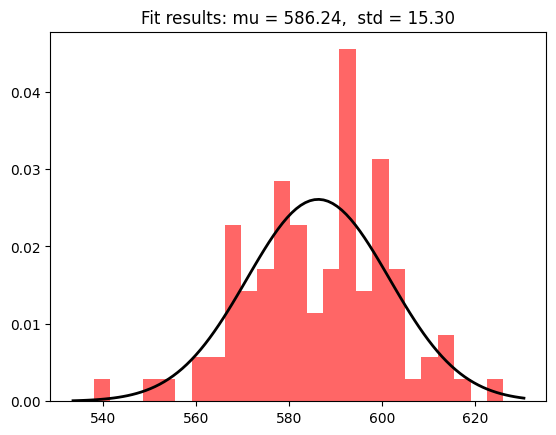

In [10]:
plotfig(player1_wins);

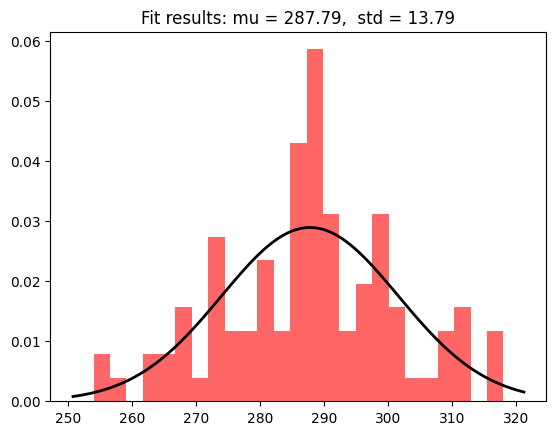

In [11]:
plotfig(player2_wins);

# **Playing Strategically**

As Player 1 always chooses either center, edge_middle or corner block

In [12]:
# Functions for Strategic Play

# ==================================================================
# START WITH CENTRE 
# Player 1 chooses booard[1][1]
def play_middle():
  board = create_board()
  # place(board,1,(1,1))
  board[1][1] = 1
  for step in range(1,9):
    random_place(board,step%2 + 1)
    res = evaluate(board)
    if (res == 0):
      continue
    else:
      return res

# ==================================================================
# START WITH EDGE-CENTRE 
# Player 1 chooses booard[0][1] -- note: all edge-centers are similar
def play_edge_middle():
  board = create_board()
  # place(board,1,(1,1))
  board[0][1] = 1
  for step in range(1,9):
    random_place(board,step%2 + 1)
    res = evaluate(board)
    if (res == 0):
      continue
    else:
      return res

# ==================================================================
# START WITH CORNER 
# Player 1 chooses booard[0][0] -- note: all corners are similar
def play_corner():
  board = create_board()
  # place(board,1,(1,1))
  board[0][0] = 1
  for step in range(1,9):
    random_place(board,step%2 + 1)
    res = evaluate(board)
    if (res == 0):
      continue
    else:
      return res
# ==================================================================

In [13]:
# Playing a total of 1000 games 100 times and 
# recording the wins for Player 1
# final[0] -- corresponds to START WITH CENTRE
# final[1] -- corresponds to START WITH EDGE-CENTRE
# final[2] -- corresponds to START WITH CORNER
final = []
# ==================================================================
player1_wins = []
for i in range(100):
  results = [play_middle() for i in range(1000)]
  dct={}
  for x in set(results):
    dct[x]=results.count(x)
  player1_wins.append(dct[1])
final.append(player1_wins)
# ==================================================================
player1_wins = []
for i in range(100):
  results = [play_edge_middle() for i in range(1000)]
  dct={}
  for x in set(results):
    dct[x]=results.count(x)
  player1_wins.append(dct[1])
final.append(player1_wins)
# ==================================================================
player1_wins = []
for i in range(100):
  results = [play_corner() for i in range(1000)]
  dct={}
  for x in set(results):
    dct[x]=results.count(x)
  player1_wins.append(dct[1])
final.append(player1_wins)
# ==================================================================

# **Plots** for *Different Strategies*

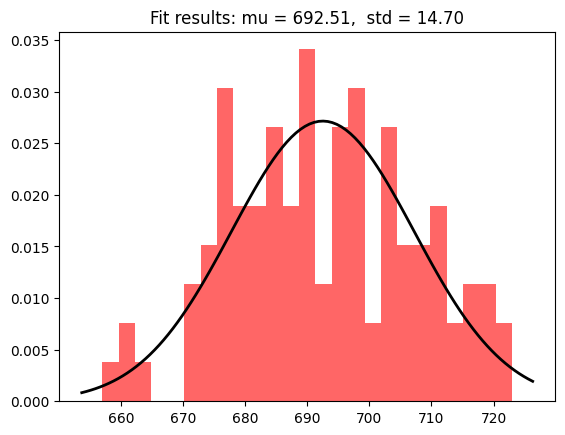

In [14]:
# Plot for Strategic playing -  START WITH CENTRE
fig = plotfig(final[0]);

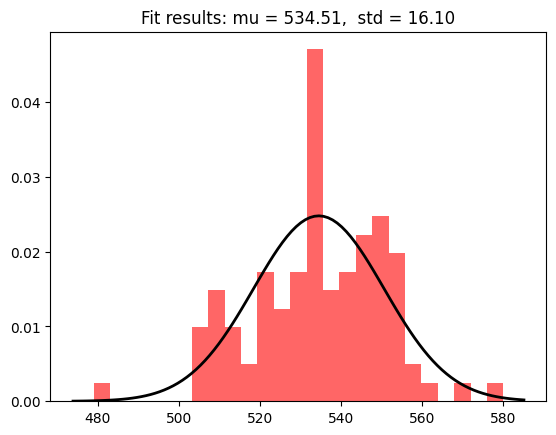

In [15]:
# Plot for Strategic playing -  START WITH EDGE-CENTRE
fig2 = plotfig(final[1]);

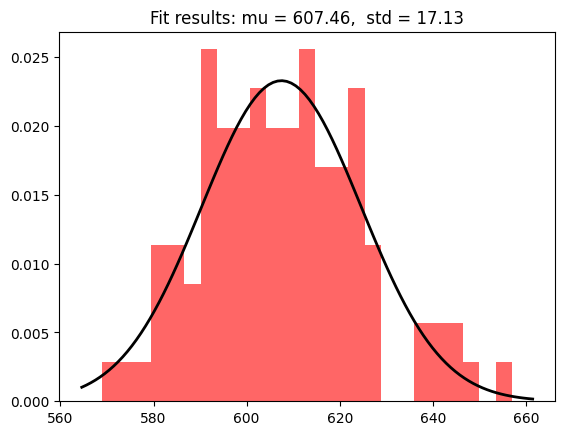

In [16]:
# Plot for Strategic playing -  START WITH CORNER
fig3 = plotfig(final[2]);